<h1><center style="color:green;">MODELO PREDICTIVO PARA LA DETECCIÓN DE FRAUDES EN TARJETAS DE CRÉDITO APLICANDO APRENDIZAJE AUTOMÁTICO</center></h1>

## Autores : Daniel Enrique Barros Agamez & Kevin Acosta Lopez


## 1. Cargando Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import ttest_ind

# Sentencia para mostrar la traza de la gráfica
%matplotlib inline

# Estilo de los gráficos
plt.style.use('ggplot')

In [2]:
COLUMNAS = np.array(['Id','Fecha de Transaccion','No tarjeta cliente','Nombre comerciante',
                    'Categoria comerciante','Monto transaccion', 'Nombre', 'Apellido',
                    'Genero','Direccion tarjeta','Ciudad','Estado','Zip tarjeta', 'Latitud',
                    'Longitud','Ciudad popular', 'Trabajo','Fecha de nacimiento', 'Fecha unica',
                    'Hora transaccion','Latitud comerciante','Longitud comerciante', 'Fraude'])
data = pd.read_csv("fraude.csv", delimiter = ',' , names = COLUMNAS , header = 0)
del(COLUMNAS)
data.head(5)

,Id,Fecha de Transaccion,No tarjeta cliente,Nombre comerciante,Categoria comerciante,Monto transaccion,Nombre,Apellido,Genero,Direccion tarjeta,...,Latitud,Longitud,Ciudad popular,Trabajo,Fecha de nacimiento,Fecha unica,Hora transaccion,Latitud comerciante,Longitud comerciante,Fraude
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## 2. Exploración de los datos

### *2.1 y 2.2 Número de instancias y atributos:*

In [4]:
shape = data.shape
print(f"Número de instancias: {shape[0]}")
print(f"Número de atributos: {shape[1]}")

Número de instancias: 563225
Número de atributos: 23


### *2.3 El conjunto de datos está etiquetado con la variable de clase "is_fraud"*

### *2.4 Cantidad de atributos numéricos y categóricos*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563225 entries, 0 to 563224
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     563225 non-null  int64  
 1   Fecha de Transaccion   563225 non-null  object 
 2   No tarjeta cliente     563225 non-null  int64  
 3   Nombre comerciante     563225 non-null  object 
 4   Categoria comerciante  563225 non-null  object 
 5   Monto transaccion      563225 non-null  float64
 6   Nombre                 563225 non-null  object 
 7   Apellido               563225 non-null  object 
 8   Genero                 563225 non-null  object 
 9   Direccion tarjeta      563225 non-null  object 
 10  Ciudad                 563225 non-null  object 
 11  Estado                 563225 non-null  object 
 12  Zip tarjeta            563225 non-null  int64  
 13  Latitud                563225 non-null  float64
 14  Longitud               563225 non-nu

In [6]:
data['Fraude'] = data['Fraude'].astype('object')
categorico = data.select_dtypes(include = 'object').columns
numerico = data.select_dtypes(include = 'int64').columns
flotante = data.select_dtypes(include = 'float64').columns

print("------CANTIDAD DE ATRIBUTOS SEGÚN SU TIPO-------")
print(f"\nVariables categoricas: {len(categorico)} \n{categorico.values}")
print(f"\nVariables númericas: {len(numerico)} \n{numerico.values}")
print(f"\nVariables numericas flotantes: {len(flotante)} \n{flotante.values}")

------CANTIDAD DE ATRIBUTOS SEGÚN SU TIPO-------

Variables categoricas: 13 
['Fecha de Transaccion' 'Nombre comerciante' 'Categoria comerciante'
 'Nombre' 'Apellido' 'Genero' 'Direccion tarjeta' 'Ciudad' 'Estado'
 'Trabajo' 'Fecha de nacimiento' 'Fecha unica' 'Fraude']

Variables númericas: 5 
['Id' 'No tarjeta cliente' 'Zip tarjeta' 'Ciudad popular'
 'Hora transaccion']

Variables numericas flotantes: 5 
['Monto transaccion' 'Latitud' 'Longitud' 'Latitud comerciante'
 'Longitud comerciante']


### *2.5 Moda, cantidad de valores únicos y frecuencia de atributos categoricos*

In [7]:
data[categorico].describe()

,Fecha de Transaccion,Nombre comerciante,Categoria comerciante,Nombre,Apellido,Genero,Direccion tarjeta,Ciudad,Estado,Trabajo,Fecha de nacimiento,Fecha unica,Fraude
count,563225,563225,563225,563225,563225,563225,563225,563225,563225,563225,563225,563225,563225
unique,552261,693,14,355,486,2,999,906,51,497,984,563225,2
top,2020-12-17 20:36:39,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,6983 Carrillo Isle,Birmingham,TX,Film/video editor,1977-03-23,a70f2446c625dace54ce68bc8adbf281,0
freq,4,1906,56988,11606,12286,308621,1476,2434,40872,4163,2424,1,553574


In [8]:
print("MODA DE LAS VARIABLES CATEGORICAS")
for i, name in enumerate(categorico):
    print(f"{i+1}. {name} \nModa: {data[name].mode().values} \n")

MODA DE LAS VARIABLES CATEGORICAS
1. Fecha de Transaccion 
Moda: ['2020-10-05 19:37:49' '2020-12-13 17:53:47' '2020-12-17 20:36:39'
 '2020-12-19 16:02:22'] 

2. Nombre comerciante 
Moda: ['fraud_Kilback LLC'] 

3. Categoria comerciante 
Moda: ['gas_transport'] 

4. Nombre 
Moda: ['Christopher'] 

5. Apellido 
Moda: ['Smith'] 

6. Genero 
Moda: ['F'] 

7. Direccion tarjeta 
Moda: ['6983 Carrillo Isle'] 

8. Ciudad 
Moda: ['Birmingham'] 

9. Estado 
Moda: ['TX'] 

10. Trabajo 
Moda: ['Film/video editor'] 

11. Fecha de nacimiento 
Moda: ['1977-03-23'] 

12. Fecha unica 
Moda: ['00005fc67bb45d98730559d40c9ca601' '00006889944d759855fea412e09ecdd8'
 '00008f7ba50172eef2b057a0e06aa142' ... 'ffff99c31e9bb9ae314e0fd5910217e3'
 'ffffbc82aa8e0ef7e6acb579c52ad599' 'ffffc1df97a828ae4c69359c9f05daab'] 

13. Fraude 
Moda: [0] 



### *2.6 Media, rango y desviación estandar de cada atributo numérico*

In [10]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Id,No tarjeta cliente,Monto transaccion,Zip tarjeta,Latitud,Longitud,Ciudad popular,Hora transaccion,Latitud comerciante,Longitud comerciante
count,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00
mean,282484.62,417605729174909888.00,75.55,48831.91,38.54,-90.23,88342.56,1380248545.45,38.54,-90.23
std,170645.17,1309403186960773632.00,170.53,26860.93,5.06,13.73,300756.40,6553585.37,5.10,13.74
min,0.00,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325466397.00,19.03,-166.67
25%,139497.00,180042946491150.00,9.73,26237.00,34.69,-96.80,741.00,1375827319.00,34.76,-96.90
50%,279515.00,3521417320836166.00,47.84,48174.00,39.37,-87.48,2408.00,1380581462.00,39.38,-87.44
75%,419686.00,4635330563105903.00,84.44,72011.00,41.89,-80.18,19685.00,1385842393.00,41.95,-80.26
max,1295733.00,4992346398065154048.00,22768.11,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95


In [11]:
#rango
print('Rango de los atributos categoricos')
data.select_dtypes(exclude='object').apply(lambda x: max(x)-min(x))

Rango de los atributos categoricos


Id                                 1295733.00
No tarjeta cliente     4992346337648947200.00
Monto transaccion                    22767.11
Zip tarjeta                          98664.00
Latitud                                 46.67
Longitud                                97.72
Ciudad popular                     2906677.00
Hora transaccion                  63067977.00
Latitud comerciante                     48.48
Longitud comerciante                    99.72
dtype: float64

### *2.7 Distribción de las clases*

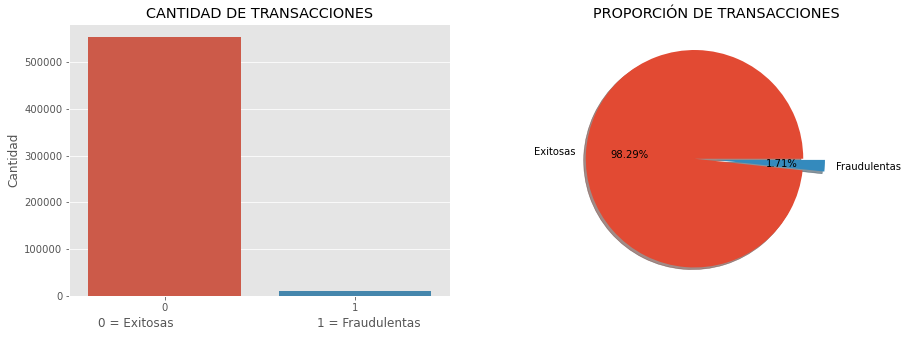

In [12]:
datos = data['Fraude'].value_counts()
labels = np.array(['Exitosas', 'Fraudulentas'])
#figura y gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
circular = ax2.pie(datos.values, labels=labels, autopct='%1.2f%%', shadow=True, explode = [0.2, 0])
#barras = ax1.bar(labels, datos.values)
barras = sb.countplot(x = 'Fraude', data = data, ax = ax1)
#Titulos
ax2.set(title="PROPORCIÓN DE TRANSACCIONES")
ax1.set(title="CANTIDAD DE TRANSACCIONES")
ax1.set(ylabel = 'Cantidad')
ax1.set(xlabel = f'0 = Exitosas {" "*35} 1 = Fraudulentas')
plt.show()

Distribución: Se puede observer cuán desequilibrado está el conjunto de datos, pues la mayoría de las transacciones no son fraudulentas. Si usamos este conjunto de datos como base para los modelos y análisis predictivos, se podrian obtener muchos errores y los algoritmos probablemente se sobreajustarán, ya que "asumirán" que la mayoría de las transacciones no son fraudes.

In [13]:
print("Cantidad de fruades : ", datos[1])
print("Cantidad casos exitosos : ", datos[0])
print("Difenrencia entre las clases: ", datos[0]-datos[1])

Cantidad de fruades :  9651
Cantidad casos exitosos :  553574
Difenrencia entre las clases:  543923


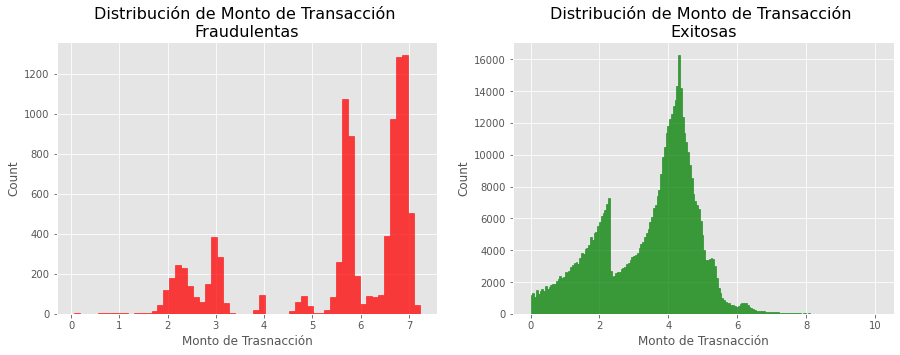

In [14]:
monto_Fra = data['Monto transaccion'].loc[data['Fraude'] == 1].values #Fraudulentas
monto_Exi = data['Monto transaccion'].loc[data['Fraude'] == 0].values #Exitosas
#Figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1 = sb.histplot(np.log(monto_Fra), ax = ax1, element = "step", color = 'red')
ax2 = sb.histplot(np.log(monto_Exi), ax = ax2, element="step", color = 'green')
#Etiquetas
ax1.set_xlabel('Monto de Trasnacción')
ax1.set_title('Distribución de Monto de Transacción \nFraudulentas', fontsize=16)
ax2.set_xlabel('Monto de Trasnacción')
ax2.set_title('Distribución de Monto de Transacción \nExitosas', fontsize=16)
plt.show()

Media Monto de Transacción :  75.54883345022084


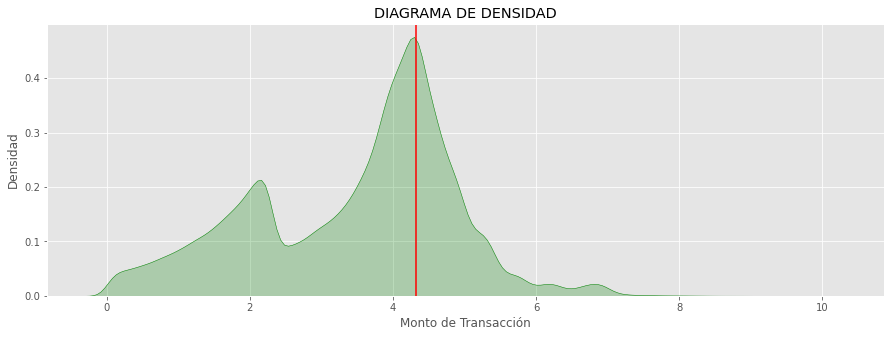

In [15]:
plt.figure(figsize=(15, 5))
media1 = data['Monto transaccion'].mean()
sb.kdeplot(x = np.log(data['Monto transaccion'].values), shade = True, color = 'green')
plt.ylabel("Densidad")
plt.xlabel("Monto de Transacción")
plt.title("DIAGRAMA DE DENSIDAD")
plt.axvline(np.log(media1), 0,1, color = 'red')
print(f"Media Monto de Transacción :  {media1}")

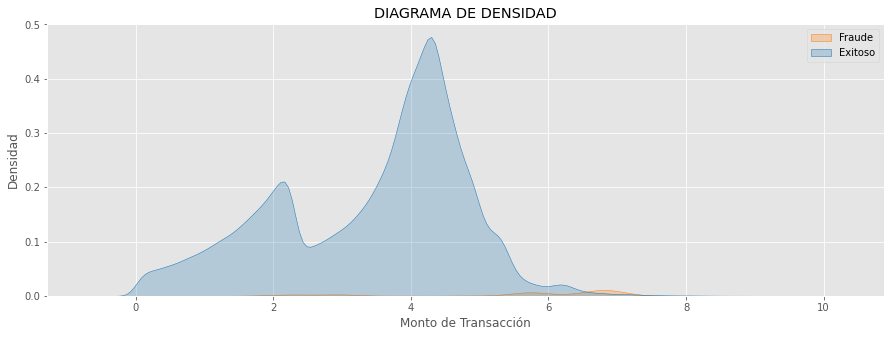

In [17]:
#Cambiar colores
plt.figure(figsize=(15, 5))
sb.kdeplot(x = np.log(data['Monto transaccion'].values), shade = True, hue = data['Fraude'], palette = "tab10", legend = False)
plt.ylabel("Densidad")
plt.xlabel("Monto de Transacción")
plt.legend(['Fraude', 'Exitoso'])
plt.title("DIAGRAMA DE DENSIDAD")
plt.show()

### *2.8 Detección de datos perdidos y atípicos*

In [19]:
#Detectando datos nulos
data.isna().sum()

Id                       0
Fecha de Transaccion     0
No tarjeta cliente       0
Nombre comerciante       0
Categoria comerciante    0
Monto transaccion        0
Nombre                   0
Apellido                 0
Genero                   0
Direccion tarjeta        0
Ciudad                   0
Estado                   0
Zip tarjeta              0
Latitud                  0
Longitud                 0
Ciudad popular           0
Trabajo                  0
Fecha de nacimiento      0
Fecha unica              0
Hora transaccion         0
Latitud comerciante      0
Longitud comerciante     0
Fraude                   0
dtype: int64

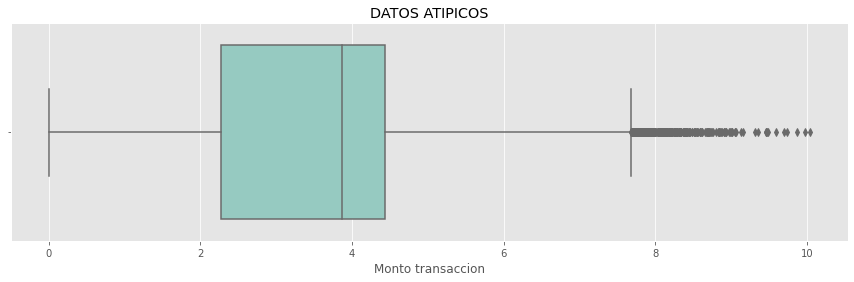

count   563225.00
mean        75.55
std        170.53
min          1.00
25%          9.73
50%         47.84
75%         84.44
max      22768.11
Name: Monto transaccion, dtype: float64
IQR:  74.71
Mediana:  47.84


In [20]:
plt.figure(figsize=(15, 4))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(x = np.log(data['Monto transaccion']), orient="h", palette="Set3")
plt.show()
print(data['Monto transaccion'].describe())
print("IQR: ", data['Monto transaccion'].quantile(0.75)-data['Monto transaccion'].quantile(0.25))
print("Mediana: ", data['Monto transaccion'].median())

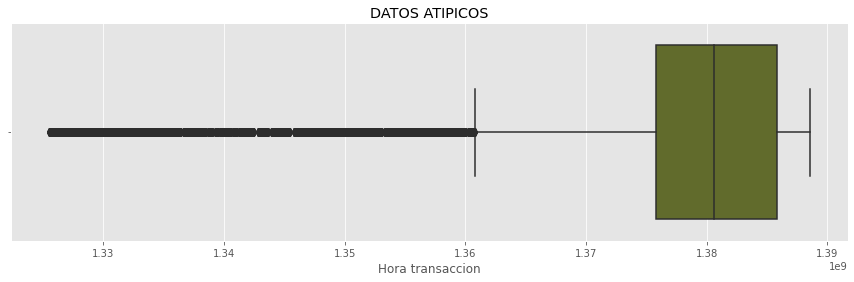

count       563225.00
mean    1380248545.45
std        6553585.37
min     1325466397.00
25%     1375827319.00
50%     1380581462.00
75%     1385842393.00
max     1388534374.00
Name: Hora transaccion, dtype: float64
IQR:  10015074.0
Mediana:  1380581462.0


In [21]:
plt.figure(figsize=(15, 4))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(x = data['Hora transaccion'], orient="h", color = '#687522')
plt.show()
print(data['Hora transaccion'].describe())
print("IQR: ", data['Hora transaccion'].quantile(0.75)-data['Hora transaccion'].quantile(0.25))
print("Mediana: ", data['Hora transaccion'].median())

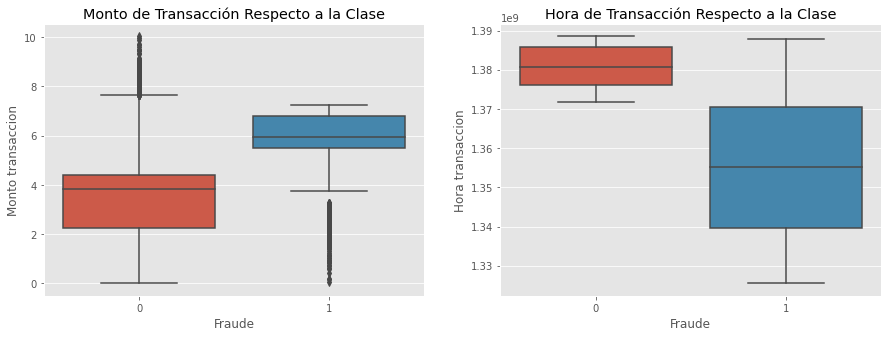

In [22]:
#Outliers monto de transacción respecto al atriuto clase
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1 = sb.boxplot(y = np.log(data["Monto transaccion"]), x = data['Fraude'], ax = ax1)
ax2 = sb.boxplot(y = data["Hora transaccion"], x = data['Fraude'], ax = ax2)
#Etiquetas
ax1.set_title('Monto de Transacción Respecto a la Clase')
ax2.set_title('Hora de Transacción Respecto a la Clase')
plt.show()

### 2.9. *Resolviendo algunas preguntas*

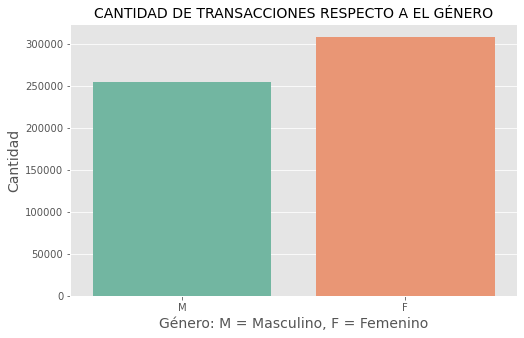

In [23]:
#Relación cantidad de transacciones y género
plt.figure(figsize=(8,5))
ax = sb.countplot(x = data['Genero'], data = data, palette="Set2")
ax.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax.set_ylabel("Cantidad", fontsize=14)
ax.set_title("CANTIDAD DE TRANSACCIONES RESPECTO A EL GÉNERO", fontsize = 14)
plt.show()

In [24]:
data.groupby('Genero')['Genero'].count().sort_values(ascending = False)

Genero
F    308621
M    254604
Name: Genero, dtype: int64

In [25]:
#Relación cantidad de transacciones exitosas y fraudulentas con respecto al género
genero_Fra = data[data.Fraude == 1] # fraudulentas
genero_Exi = data[data.Fraude == 0] # exitosas

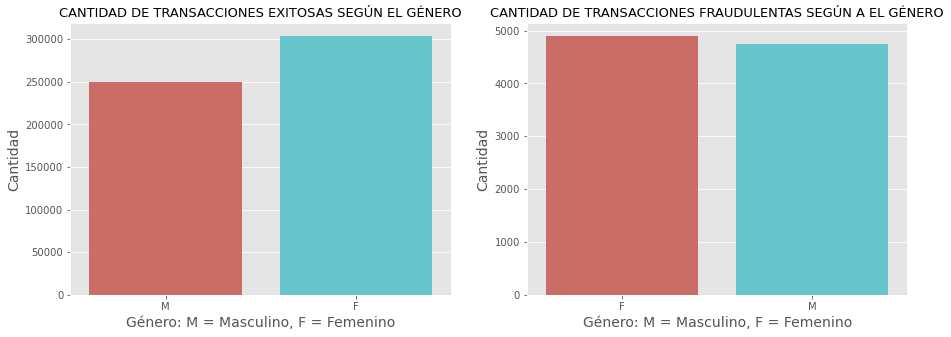

In [26]:
#Figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
#Gráfica
ax1 = sb.countplot(x = 'Genero', data = genero_Exi, ax = ax1, palette = 'hls')
ax2 = sb.countplot(x = 'Genero', data = genero_Fra, ax = ax2, palette = 'hls')
#Etiquetas
ax1.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax1.set_ylabel("Cantidad", fontsize=14)
ax1.set_title("CANTIDAD DE TRANSACCIONES EXITOSAS SEGÚN EL GÉNERO", fontsize=13)
ax2.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax2.set_ylabel("Cantidad", fontsize=14)
ax2.set_title("CANTIDAD DE TRANSACCIONES FRAUDULENTAS SEGÚN A EL GÉNERO", fontsize=13)
plt.show()

In [27]:
#data['Fecha de Transaccion'] = pd.to_datetime(data['Fecha de Transaccion'])
#ax = sb.lineplot(x='Fecha de Transaccion', data = data)
estados = data.groupby('Estado')['Estado'].count().sort_values(ascending = False).head(10)

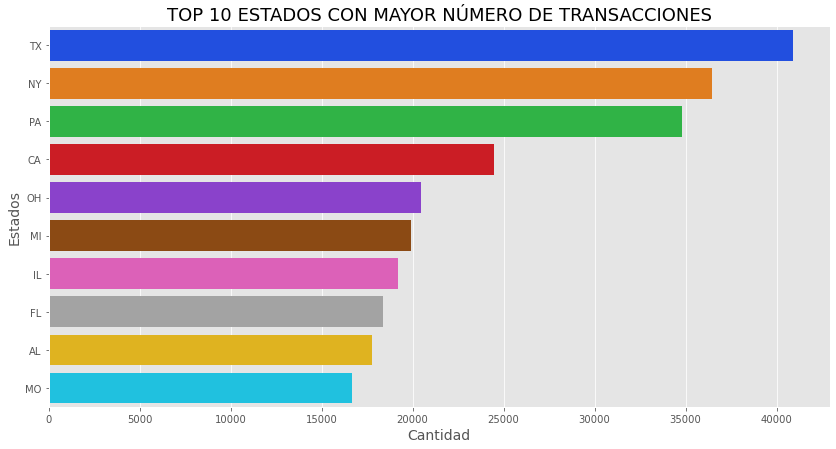

Estado
TX    40872
NY    36473
PA    34784
CA    24461
OH    20468
MI    19909
IL    19208
FL    18385
AL    17747
MO    16692
Name: Estado, dtype: int64


In [27]:
#Relación cantidad de transacciones y Estado
plt.figure(figsize=(14,7))
ax = sb.barplot(x = estados.values, y = estados.index, palette="bright")
ax.set_ylabel("Estados", fontsize=14)
ax.set_xlabel("Cantidad", fontsize=14)
ax.set_title("TOP 10 ESTADOS CON MAYOR NÚMERO DE TRANSACCIONES", fontsize=18)
plt.show()
print(estados)

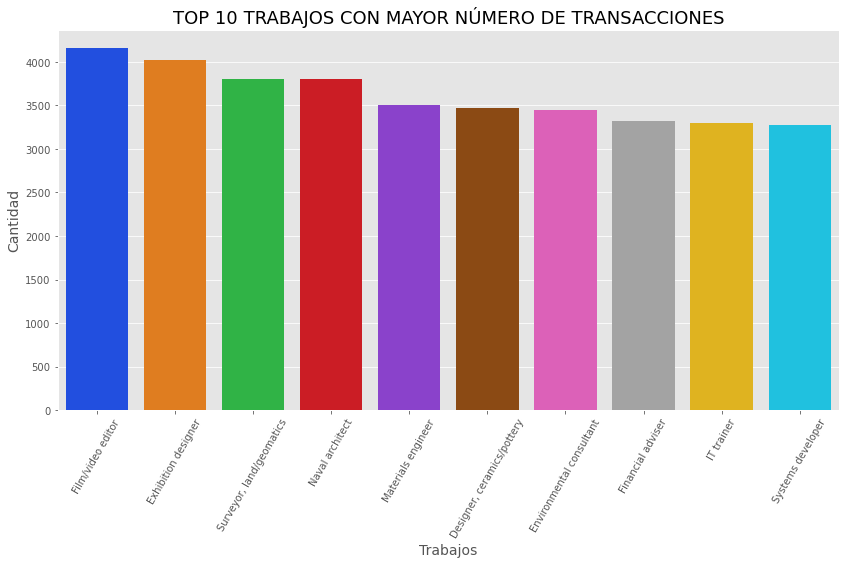

Trabajo
Film/video editor             4163
Exhibition designer           4019
Surveyor, land/geomatics      3806
Naval architect               3803
Materials engineer            3503
Designer, ceramics/pottery    3475
Environmental consultant      3449
Financial adviser             3327
IT trainer                    3293
Systems developer             3275
Name: Trabajo, dtype: int64


In [28]:
#Relación cantidad de transacciones y trabajos
trabajos = data.groupby('Trabajo')['Trabajo'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(14,7))
ax = sb.barplot(y = trabajos.values, x = trabajos.index, palette="bright")
ax.set_ylabel("Cantidad", fontsize=14)
ax.set_xlabel("Trabajos", fontsize=14)
ax.set_xticklabels(trabajos.index, rotation = 60) 
ax.set_title("TOP 10 TRABAJOS CON MAYOR NÚMERO DE TRANSACCIONES", fontsize=18)
plt.show()
print(trabajos)

### *2.10. MATRIZ DE CORRELACIÓN Y COVARIANZA*

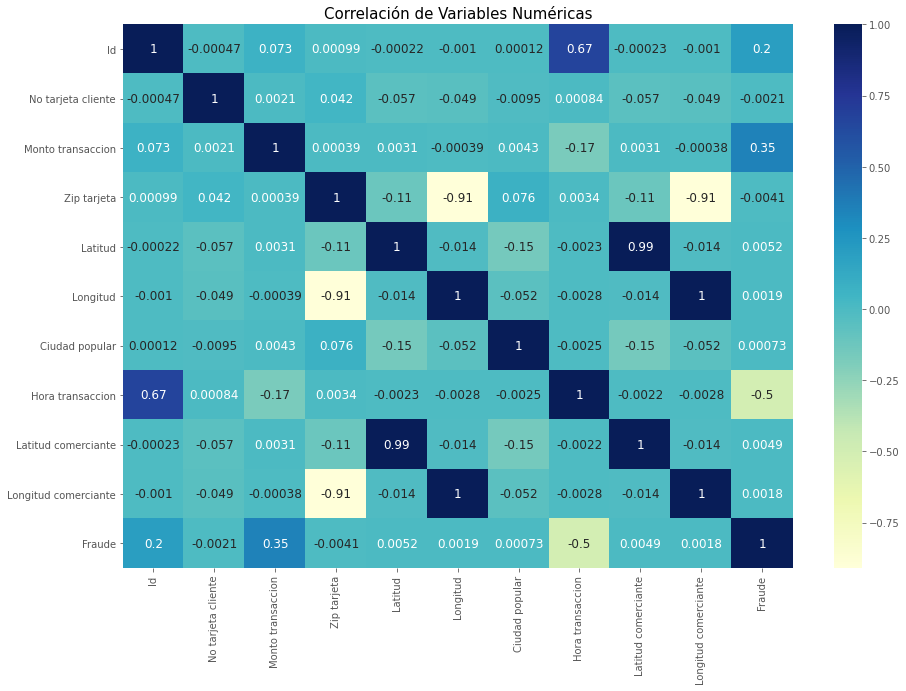

In [28]:
data['Fraude'] = data['Fraude'].astype('int64')
plt.figure(figsize=(15,10))
pc = data.corr(method ='pearson')
ax = sb.heatmap(pc, annot=True, annot_kws={'size': 12}, cmap="YlGnBu")
ax.set_title('Correlación de Variables Numéricas', fontsize = 15)
plt.show()
del(pc)

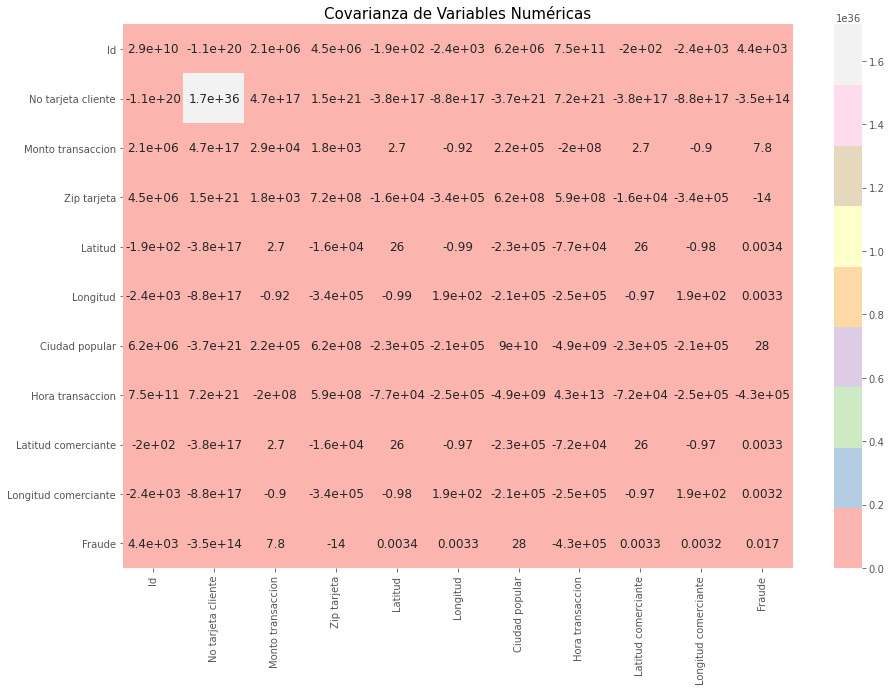

In [29]:
#Matriz de Covarianza
plt.figure(figsize=(15,10))
ax = sb.heatmap(data.cov(), annot=True, annot_kws={'size': 12}, cmap="Pastel1")
ax.set_title('Covarianza de Variables Numéricas', fontsize = 15)
plt.show()

### 2.11. *Hipótesis*


In [30]:
def prueba(p):
    if (p < 0.05):
        return ("Si existen diferencias significativas")
    return("No se econtrarón diferencias significativas")

### Primera Hipótesis
- Hipotesis Alternativa: si existen diferencias significativas en el monto de la transaccion de los hombres y de las mujeres
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5


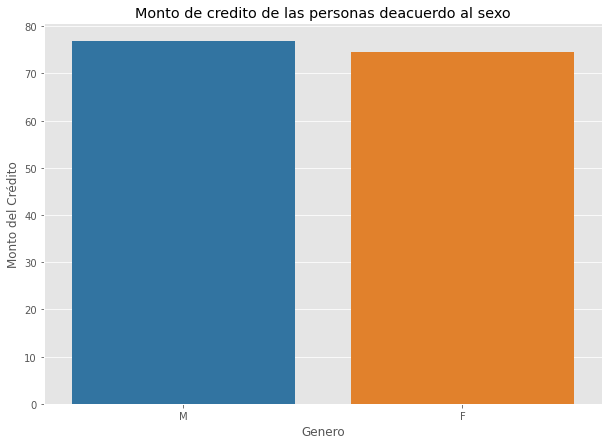

In [88]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Genero', y = 'Monto transaccion', data = data, ci = None, palette="tab10")
plt.title("Monto de credito de las personas deacuerdo al sexo")
plt.ylabel("Monto del Crédito")
plt.xlabel("Genero")
plt.show()

In [50]:
hombre = data.loc[data['Genero'] == 'M']
mujer =  data.loc[data['Genero'] == 'F']
hombreMonto = hombre['Monto transaccion']
mujerMonto = mujer['Monto transaccion']
stat, p = ttest_ind(hombreMonto, mujerMonto, equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=4.917, p=0.000001


In [53]:
prueba(p)

'Si existen diferencias significativas'

### Dado el resultado podemos decir que la hipótesis alternativa es rechazada  y es aceptada la hipotesis nula, osea que no hay diferencias

### Segunda Hipótesis
- Hipotesis Alternativa: si existen diferencias significativas en el monto de transacciones segun la clase 
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5

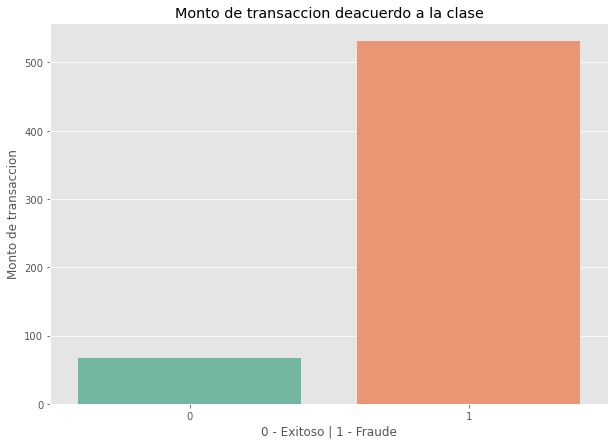

In [87]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Fraude', y = 'Monto transaccion', data = data, ci = None, palette="Set2")
plt.title("Monto de transaccion deacuerdo a la clase")
plt.ylabel("Monto de transaccion")
plt.xlabel("0 - Exitoso | 1 - Fraude")
plt.show()

In [32]:
NoFraude = data.loc[data['Fraude'] == 0]
SiFraude =  data.loc[data['Fraude'] == 1]
NoFraudeMonto = NoFraude['Monto transaccion']
SiFraudeMonto = SiFraude['Monto transaccion']

In [33]:
stat, p = ttest_ind(SiFraudeMonto, NoFraudeMonto , equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=54.316, p=0.000000


In [34]:
prueba(p)

'Si existen diferencias significativas'

### Dado el resultado podemos decir que la hipótesis alternativa es aceptada por lo tanto si existen diferencias significativas

In [49]:
stat, p = ttest_ind(new_Data['Genero'], new_Data['Monto transaccion'] , equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=-111.535, p=0.000000


## 3. Procesamiento de los Datos

### Se realizarán tareas como:
- Selección de los datos
- Limpieza de los datos
- Construcción de los datos
- Integración de los datos

### *5.1 Selección de los datos*

In [30]:
data.head(5)

,Id,Fecha de Transaccion,No tarjeta cliente,Nombre comerciante,Categoria comerciante,Monto transaccion,Nombre,Apellido,Genero,Direccion tarjeta,...,Latitud,Longitud,Ciudad popular,Trabajo,Fecha de nacimiento,Fecha unica,Hora transaccion,Latitud comerciante,Longitud comerciante,Fraude
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.97,-80.94,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.99,-81.20,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.32,-110.44,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.45,-109.96,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.67,-73.54,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.50,-74.20,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.57,-80.82,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.81,-80.88,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.25,-85.02,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.96,-85.88,0


In [31]:
#Cantidad de Datos unicos de cada atributo
print("VALORES ÚNICOS DE LOS ATRIBUTOS")
for i, name in enumerate(data.columns):
    print(f"{i+1}. {name}: {len(data[name].unique())}")

VALORES ÚNICOS DE LOS ATRIBUTOS
1. Id: 559984
2. Fecha de Transaccion: 552261
3. No tarjeta cliente: 999
4. Nombre comerciante: 693
5. Categoria comerciante: 14
6. Monto transaccion: 41741
7. Nombre: 355
8. Apellido: 486
9. Genero: 2
10. Direccion tarjeta: 999
11. Ciudad: 906
12. Estado: 51
13. Zip tarjeta: 985
14. Latitud: 983
15. Longitud: 983
16. Ciudad popular: 891
17. Trabajo: 497
18. Fecha de nacimiento: 984
19. Fecha unica: 563225
20. Hora transaccion: 552261
21. Latitud comerciante: 553761
22. Longitud comerciante: 559167
23. Fraude: 2


In [32]:
#Eliminación de atributos que no son relevantes
data2 = data.drop(columns=['Id', 'Fecha unica', 'Nombre', 'Apellido', 'Nombre comerciante',
                            'Direccion tarjeta', 'Latitud comerciante', 'Longitud comerciante',
                            'Estado', 'Trabajo', 'Zip tarjeta', 'Ciudad', 'Ciudad popular',
                            'Latitud', 'Longitud'])

Se toma la decisión de eliminar los atributos de la sentencia anterior por las siguientes reazones:
- algunos son iguales a los otros ejemplo Latitdu y Longitud con latitud y longitud del comerciante
- Algunos como Nombre, Apellido, y ID  son atributos para identificar el registro y que probalisticamente no aportarían a la predicción

In [33]:
data2.head(3)

,Fecha de Transaccion,No tarjeta cliente,Categoria comerciante,Monto transaccion,Genero,Fecha de nacimiento,Hora transaccion,Fraude
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,1968-03-19,1371816865,0
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,1990-01-17,1371816873,0
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,1970-10-21,1371816893,0


In [34]:
#Verificando instancias duplicadas para eliminarlos ---> False indica que no existen duplicados
data2.duplicated().value_counts()

False    563225
dtype: int64

In [35]:
#Procesando fechas para obtener la edad de la persona
fecha_Tra = data2['Fecha de Transaccion'].apply(lambda x: x[0:10])
fecha_Tra = pd.to_datetime(fecha_Tra)
fecha_Nac = pd.to_datetime(data2['Fecha de nacimiento'])
edad = ((fecha_Tra - fecha_Nac)/365).apply(lambda x : str(x).split()[0]).astype('int8')
edad.head(5)

0    52
1    30
2    49
3    32
4    65
dtype: int8

In [36]:
#Procesando fecha de transacción para dividir el atributo compuesto
anio = fecha_Tra.apply(lambda x : x.year)
mes = fecha_Tra.apply(lambda x : x.month)
dia = fecha_Tra.apply(lambda x : x.day)

In [37]:
#Se debe ejecutar una sola vez
data2 = data2.drop(columns = ['Fecha de nacimiento', 'Fecha de Transaccion'])
data2 = data2.assign(anio = anio, mes = mes, dia = dia, edad = edad)

In [39]:
data2['Categoria comerciante'].value_counts()

gas_transport     56988
grocery_pos       54296
home              52543
shopping_pos      50634
kids_pets         48931
shopping_net      43492
entertainment     40337
personal_care     39547
food_dining       39419
health_fitness    36807
misc_pos          34824
misc_net          28282
grocery_net       19560
travel            17565
Name: Categoria comerciante, dtype: int64

In [40]:
#Codificando las Variables categoricas ---> cat.codes: Codifica por orden alfabetico
data2 = pd.get_dummies(data2, columns = ['Categoria comerciante'], prefix = 'C')
data2['Genero'] = data2['Genero'].astype('category').cat.codes
fraude = data2.Fraude
data2.drop('Fraude', axis = 1, inplace = True)
data2['Fraude'] = fraude
del(fraude)
data2.head(3)

,No tarjeta cliente,Monto transaccion,Genero,Hora transaccion,anio,mes,dia,edad,C_entertainment,C_food_dining,...,C_health_fitness,C_home,C_kids_pets,C_misc_net,C_misc_pos,C_personal_care,C_shopping_net,C_shopping_pos,C_travel,Fraude
0,2291163933867244,2.86,1,1371816865,2020,6,21,52,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3573030041201292,29.84,0,1371816873,2020,6,21,30,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3598215285024754,41.28,0,1371816893,2020,6,21,49,0,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
#Escalando Datos
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = MinMaxScaler()
#scaler = RobustScaler() 

In [42]:
data_Scaled = pd.DataFrame(scaler.fit_transform(data2), columns = data2.columns)

In [43]:
data_Scaled.head(10)

,No tarjeta cliente,Monto transaccion,Genero,Hora transaccion,anio,mes,dia,edad,C_entertainment,C_food_dining,...,C_health_fitness,C_home,C_kids_pets,C_misc_net,C_misc_pos,C_personal_care,C_shopping_net,C_shopping_pos,C_travel,Fraude
0,0.00,0.00,1.00,0.73,1.00,0.45,0.67,0.46,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.73,1.00,0.45,0.67,0.20,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.73,1.00,0.45,0.67,0.43,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,1.00,0.73,1.00,0.45,0.67,0.22,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,1.00,0.73,1.00,0.45,0.67,0.62,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
5,0.00,0.00,0.00,0.73,1.00,0.45,0.67,0.17,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.01,0.00,0.73,1.00,0.45,0.67,0.67,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.73,1.00,0.45,0.67,0.41,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
8,0.00,0.00,1.00,0.73,1.00,0.45,0.67,0.40,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
9,0.00,0.00,0.00,0.73,1.00,0.45,0.67,0.61,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [44]:
data_Scaled.describe()

,No tarjeta cliente,Monto transaccion,Genero,Hora transaccion,anio,mes,dia,edad,C_entertainment,C_food_dining,...,C_health_fitness,C_home,C_kids_pets,C_misc_net,C_misc_pos,C_personal_care,C_shopping_net,C_shopping_pos,C_travel,Fraude
count,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,...,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00
mean,0.08,0.00,0.45,0.87,0.99,0.77,0.52,0.40,0.07,0.07,...,0.07,0.09,0.09,0.05,0.06,0.07,0.08,0.09,0.03,0.02
std,0.26,0.01,0.50,0.10,0.10,0.19,0.30,0.21,0.26,0.26,...,0.25,0.29,0.28,0.22,0.24,0.26,0.27,0.29,0.17,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.80,1.00,0.64,0.27,0.23,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.87,1.00,0.82,0.53,0.37,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,0.96,1.00,0.91,0.77,0.54,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [45]:
#Cantidad de datos clasificados por fraudes
cantidad = data2['Fraude'].value_counts()
print('Cantidad total de datos: ', cantidad.sum())
print('Cantidad Fraudulentas: ', cantidad[1])
print('Cantidad Exitosas: ', cantidad[0])

Cantidad total de datos:  563225
Cantidad Fraudulentas:  9651
Cantidad Exitosas:  553574


In [46]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
X = data_Scaled.drop('Fraude', axis = 1)
y = data_Scaled.Fraude

sk = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sk.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Distribución de Etiquetas:')
print((train_counts_label/ len(original_ytrain))*100)
print((test_counts_label/ len(original_ytest))*100)

Train: [111145 111146 111147 ... 563222 563223 563224] Test: [     0      1      2 ... 432481 432545 432643]
Train: [     0      1      2 ... 563222 563223 563224] Test: [111145 111146 111147 ... 557431 557432 557433]
Train: [     0      1      2 ... 563222 563223 563224] Test: [222402 222403 222404 ... 559361 559362 559363]
Train: [     0      1      2 ... 563222 563223 563224] Test: [333707 333708 333709 ... 561291 561292 561293]
Train: [     0      1      2 ... 561291 561292 561293] Test: [444821 444822 444823 ... 563222 563223 563224]
----------------------------------------------------------------------------------------------------
Distribución de Etiquetas:
[98.28665276  1.71334724]
[98.28576501  1.71423499]


In [47]:
print("Porcentaje del conjunto de entrenamiento: ", (np.round(original_Xtrain.shape[0]/cantidad.sum(), 3)*100),"%")
print("Porcentaje del conjunto Test: ", (np.round(original_Xtest.shape[0]/cantidad.sum(), 3)*100),"%")

Porcentaje del conjunto de entrenamiento:  80.0 %
Porcentaje del conjunto Test:  20.0 %


### Creando Modelos de Clasificación
- 1. Abordando los datos desbalanceados
- 2. Sub-Muestra Aleatoria

In [55]:
#Modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Métricas
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from collections import Counter

In [51]:
def comparar_Modelos(datos, labels, grid):
    plt.figure(figsize = (15,10))
    plt.title("MATRIZ DE CONFUSÍON", fontsize=16)
    i = 0
    for titulo, matriz in datos:
        i += 1 
        plt.subplot(grid[0],grid[1], i)
        ax = sb.heatmap(matriz, annot = True, linewidths=0.5, cmap=grid[2], xticklabels = labels,
                        yticklabels = labels, annot_kws = {'size': 18}, fmt = 'g')
        ax.set_title(titulo)

In [62]:
def graficar_Curva_Multiple(diccionario, salida_Test, salidas_Models):
    plt.figure(figsize=(14,8))
    plt.title(f'Curva ROC \n Top {len(diccionario)} Clasificadores', fontsize=18)
    for key in diccionario.keys():
        plt.plot(diccionario[key][0], diccionario[key][1],
                label = f"{key[2:]} Score: {np.round(roc_auc_score(salida_Test, salidas_Models[key]),4)}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Tasa Falsos Positivos', fontsize=16)
    plt.ylabel('Tasa Verdaderos Positivos', fontsize=16)
    plt.annotate('Puntaje mínimo de ROC del 50% \n (Esta es la puntuación mínima para obtener)',
                 xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()

In [49]:
#Modelos
clf_Logistc = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
clf_Log_Bal = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")

#Entrenamiento
clf_Logistc.fit(original_Xtrain, original_ytrain)
clf_Log_Bal.fit(original_Xtrain, original_ytrain)

#Predicción
y_log = clf_Logistc.predict(original_Xtest)
y_log_Bal = clf_Log_Bal.predict(original_Xtest)

Regresión Logistica Score: 98.27%
Regresión Logistica Score Tuneado: 98.95%


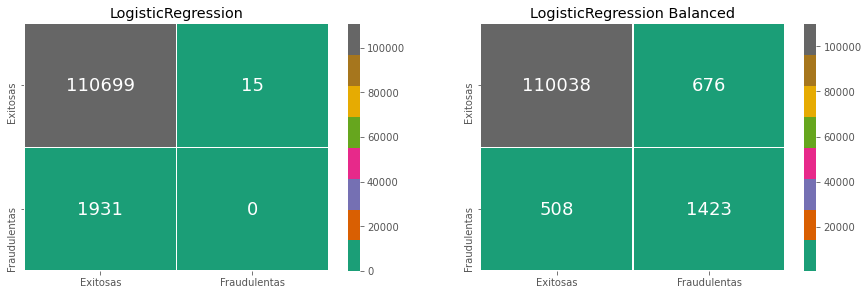

In [60]:
datos = [("LogisticRegression", confusion_matrix(original_ytest, y_log)),
         ("LogisticRegression Balanced", confusion_matrix(original_ytest, y_log_Bal))]  

print("Regresión Logistica Score: {:.2f}%".format(accuracy_score(original_ytest, y_log)*100))
print("Regresión Logistica Score Tuneado: {:.2f}%".format(accuracy_score(original_ytest, y_log_Bal)*100))
         
comparar_Modelos(datos, labels, [2,2, 'Dark2'])
plt.show()

In [69]:
print(f"{' '*20}REPORTE DE CLASIFICACIÓN LOGISTCREGESSION")
print(classification_report(y_true=original_ytest, y_pred=y_log, target_names=labels))
print(f"{'='*110}")
print(f"{' '*20}REPORTE DE CLASIFICACIÓN LOGISTCREGESSION BALANCED")
print(classification_report(y_true=original_ytest, y_pred=y_log_Bal, target_names=labels))    

                    REPORTE DE CLASIFICACIÓN LOGISTCREGESSION
              precision    recall  f1-score   support

    Exitosas       0.98      1.00      0.99    110714
Fraudulentas       0.00      0.00      0.00      1931

    accuracy                           0.98    112645
   macro avg       0.49      0.50      0.50    112645
weighted avg       0.97      0.98      0.97    112645

                    REPORTE DE CLASIFICACIÓN LOGISTCREGESSION BALANCED
              precision    recall  f1-score   support

    Exitosas       1.00      0.99      0.99    110714
Fraudulentas       0.68      0.74      0.71      1931

    accuracy                           0.99    112645
   macro avg       0.84      0.87      0.85    112645
weighted avg       0.99      0.99      0.99    112645



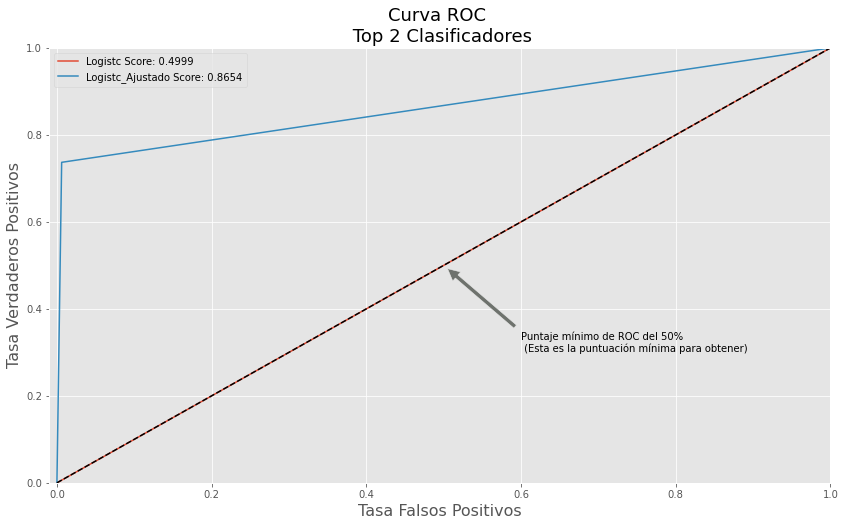

In [73]:
curva_ROC_Logist = {
    'y_Logistc' : roc_curve(original_ytest, y_log),
    'y_Logistc_Ajustado' : roc_curve(original_ytest, y_log_Bal)
}
salidas_Logist = {
    'y_Logistc' : y_log,
    'y_Logistc_Ajustado' : y_log_Bal
}
graficar_Curva_Multiple(curva_ROC_Logist, original_ytest, salidas_Logist)
plt.show()

#### Analizando la matrices de confusión, los reportes de clasificación y la cuerva ROC podemos expresar lo siguiente:
- El primer módelo logistico sufrió un sabre-ajuste debido a la clase mayoritaria, pues no logró detectar alguna transacción fraudulenta, pero logró un detactar un gran porcentaje de las exitosas, fallando solo en 15 de ellas.
- Es interesante ver que en el segundo modelo con ajustar un hiperparámetro logra detectar casos de la clase minorista, pero penalizando la clase mayorista, pues la tasa de errores aumenta a la cantidad de 676.
- El areá bajo la curva del primer modelo es bastante deficiente logrando un 49%.

### *2. Balance de la población a través de una submuestra aleatoria*

### ¿Por qué creamos una submuestra?
En la distribución de la clase vimos que el conjunto de datos estaba muy desequilibrado, el cual puede provocar los siguientes problemas:
- Sobreajuste: Los modelos de clasificación supondrán que en la mayoría de los casos no hay fraudes y no detectaran las transacciones fraudulentas, lo cual es el objetivo principal.
- Correlaciones incorrectas: Al existir el desbalance no se podran ver con claridad las correlaciones verdaderas entre la clase y las características.

In [142]:
#Obtener muestra aleatoria de los datos
data_Scaled = data_Scaled.sample(frac = 1)

#Separamos las cantidades por la Clase y escogemos la submuestra de la clase mayoritaria
data_Fra = data_Scaled.loc[data2['Fraude'] == 1]
data_Exi = data_Scaled.loc[data2['Fraude'] == 0][:cantidad[1]]

#Uniendo los datos
new_Data = pd.concat([data_Fra, data_Exi]).sample(frac = 1, random_state = 1)
new_Data.head() 

,No tarjeta cliente,Monto transaccion,Genero,Hora transaccion,anio,mes,dia,edad,C_entertainment,C_food_dining,...,C_health_fitness,C_home,C_kids_pets,C_misc_net,C_misc_pos,C_personal_care,C_shopping_net,C_shopping_pos,C_travel,Fraude
523128,0.00,0.00,0.00,0.99,1.00,1.00,0.77,0.22,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
136031,0.00,0.01,0.00,0.80,1.00,0.64,0.23,0.30,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
258237,0.00,0.04,1.00,0.86,1.00,0.73,0.73,0.46,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
562580,0.00,0.04,0.00,0.68,1.00,0.36,0.33,0.34,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
561668,0.00,0.05,1.00,0.58,1.00,0.18,0.07,0.26,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


In [143]:
#Tamaño de la submuestra aleatoria ---> Debe dar 19.302
new_Data.shape

(19302, 23)

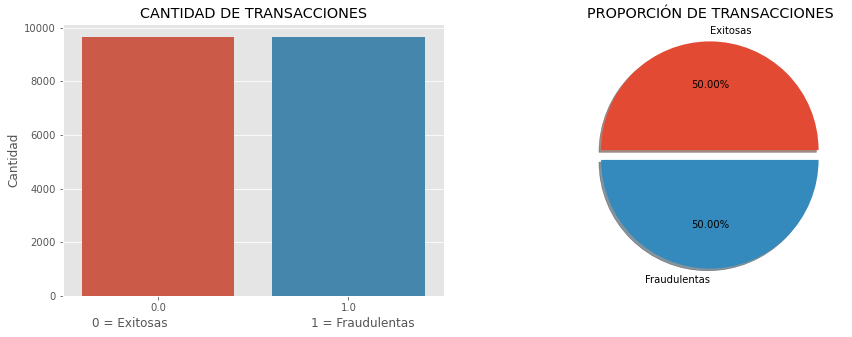

In [144]:
datos = new_Data['Fraude'].value_counts()
labels = np.array(['Exitosas', 'Fraudulentas'])
#figura y gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
circular = ax2.pie(datos.values, labels=labels, autopct='%1.2f%%', shadow=True, explode = [0.09, 0])
#barras = ax1.bar(labels, datos.values)
barras = sb.countplot(x = 'Fraude', data = new_Data, ax = ax1)
#Titulos
ax2.set(title="PROPORCIÓN DE TRANSACCIONES")
ax1.set(title="CANTIDAD DE TRANSACCIONES")
ax1.set(ylabel = 'Cantidad')
ax1.set(xlabel = f'0 = Exitosas {" "*35} 1 = Fraudulentas')
plt.show()

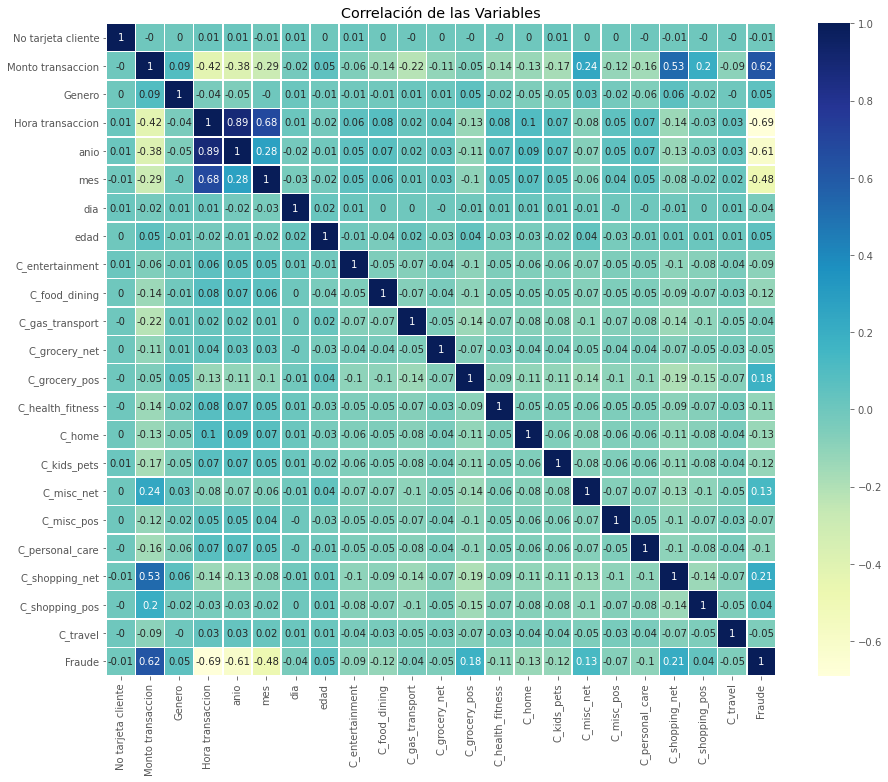

In [145]:
plt.figure(figsize=(15,12))
pc = new_Data.corr(method ='pearson').round(2)
ax = sb.heatmap(pc, annot=True, annot_kws={'size': 10}, linewidths=0.5, cmap='YlGnBu')
plt.title('Correlación de las Variables')
plt.show()

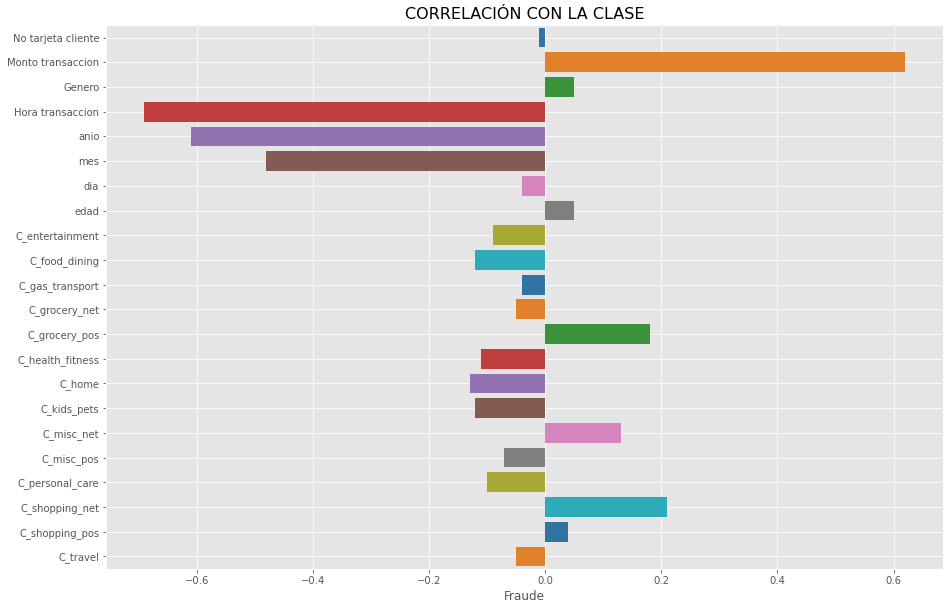

In [146]:
plt.figure(figsize = (15, 10))
valores = pc.Fraude.drop('Fraude')
ax = sb.barplot(y = valores.index, x = valores.values, palette = 'tab10', orient = 'h')
ax.set_xlabel('Fraude')
plt.title("CORRELACIÓN CON LA CLASE", fontsize = 16), plt.xticks(rotation = 0), plt.grid(True)
plt.show() 

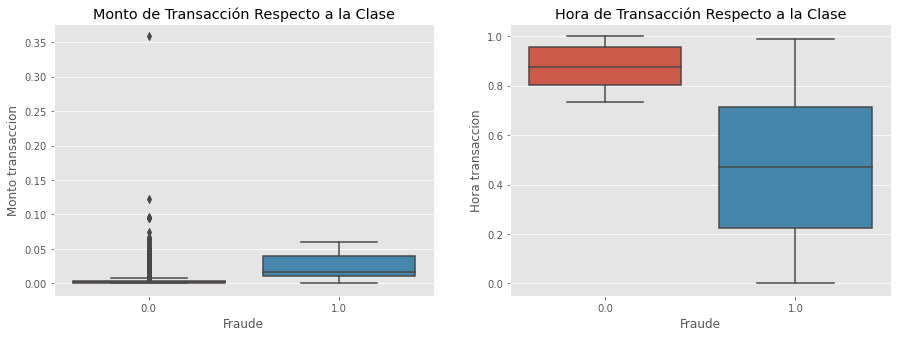

In [147]:
#Outliers monto de transacción respecto al atriuto clase
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1 = sb.boxplot(y = "Monto transaccion", x = 'Fraude', data = new_Data, ax = ax1)
ax2 = sb.boxplot(y = "Hora transaccion", x = 'Fraude', data = new_Data, ax = ax2)
#Etiquetas
ax1.set_title('Monto de Transacción Respecto a la Clase')
ax2.set_title('Hora de Transacción Respecto a la Clase')
plt.show()

In [148]:
#Tratando los datos atípicos del atributo monto de transacción cuando el registro no es fraudulento
reg_Exit = new_Data[new_Data.Fraude == 0]
reg_Fra = new_Data[new_Data.Fraude == 1]
Q1 = reg_Exit['Monto transaccion'].quantile(.25)
Q3 = reg_Exit['Monto transaccion'].quantile(.75)
IQR = Q3 - Q1
mediana = reg_Exit['Monto transaccion'].median()
v_Min = reg_Exit['Monto transaccion'].min()
v_Max = reg_Exit['Monto transaccion'].max()
big_Inf = (Q1 - 1.5 * IQR)
big_Sup = (Q3 + 1.5 * IQR)

In [149]:
print("Valores del Gráfico de Caja y Bigotes del Monto de Transacción Exitosas")
print("Mediana: {:.3f}".format(mediana))
print("Primer Cuartil: {:.3f}".format(Q1))
print("Tercer Cuartil: {:.3f}".format(Q3))
print("Rango Intercuartil: {:.3f}".format(IQR))
print("Valor Minimo: {:.3f}".format(v_Min))
print("Valor Máximo: {:.3f}".format(v_Max))
print ("Bigote Superior: {:.3f}".format(big_Sup))
print ("Bigote Inferior: {:.3f}".format(big_Inf))

Valores del Gráfico de Caja y Bigotes del Monto de Transacción Exitosas
Mediana: 0.002
Primer Cuartil: 0.000
Tercer Cuartil: 0.004
Rango Intercuartil: 0.003
Valor Minimo: 0.000
Valor Máximo: 0.358
Bigote Superior: 0.008
Bigote Inferior: -0.004


In [150]:
ubicacion = reg_Exit['Monto transaccion'] > big_Sup
ubicacion.value_counts()

False    9153
True      498
Name: Monto transaccion, dtype: int64

In [151]:
datos_sin_out = pd.concat([reg_Exit[reg_Exit['Monto transaccion'] <= big_Sup], reg_Fra], ignore_index=True)

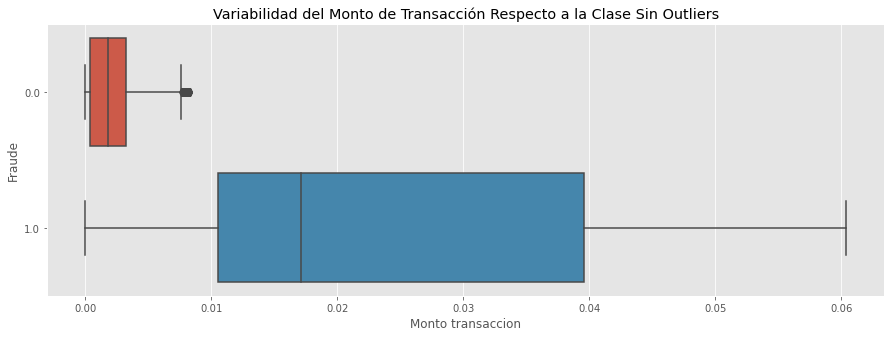

In [152]:
plt.figure(figsize=(15, 5))
ax = sb.boxplot(x = "Monto transaccion", y = 'Fraude', data = datos_sin_out, orient = 'h')
ax.set_title('Variabilidad del Monto de Transacción Respecto a la Clase Sin Outliers')
plt.show()

In [153]:
print("Cantidad de datos sin outlaiers: ", datos_sin_out.shape[0])

Cantidad de datos sin outlaiers:  18804


## División de los datos y creación de los Modelos

In [63]:
from sklearn.model_selection import cross_val_score

In [172]:
#Reportes de Calificacion
def reporte_Clasificacion(salida_Pred, salida_Deseada, labels):
    for key in salida_Pred.keys():
        print(f"{'='*110}")
        print(f"{' '*20}REPORTE DE CLASIFICACIÓN {key[2:]}")
        print(classification_report(y_true=salida_Deseada, y_pred=salida_Pred[key], target_names=labels))    

In [157]:
#Dividiendo los datos
X_Sub = datos_sin_out.drop('Fraude', axis = 1)
y_Sub = datos_sin_out.Fraude

print("Cantidad de datos para el entrenamiento: ", X_Sub.shape[0])

Cantidad de datos para el entrenamiento:  18804


In [158]:
# Modelos de clasificación
models = {
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(solver="newton-cg"),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [160]:
for key, model in models.items():
    model_Rendmiento(model, X_Sub, y_Sub)

Clasificador:  GaussianNB
Rendimiento del entrenamiento: 93.927%
Rendimiento del entrenamiento con VC: 93.932%
Clasificador:  LogisticRegression
Rendimiento del entrenamiento: 89.018%
Rendimiento del entrenamiento con VC: 88.311%
Clasificador:  SVC
Rendimiento del entrenamiento: 89.587%
Rendimiento del entrenamiento con VC: 88.646%
Clasificador:  DecisionTreeClassifier
Rendimiento del entrenamiento: 100.000%
Rendimiento del entrenamiento con VC: 98.203%


In [161]:
#Diccionario de las salidas predecidas
predict = np.array(['y_GNB', 'y_Logistc', 'y_SVC', 'y_Tree'])
salidas = {}
for i, model in enumerate(models.values()):
    salidas[predict[i]] = model.predict(original_Xtest)

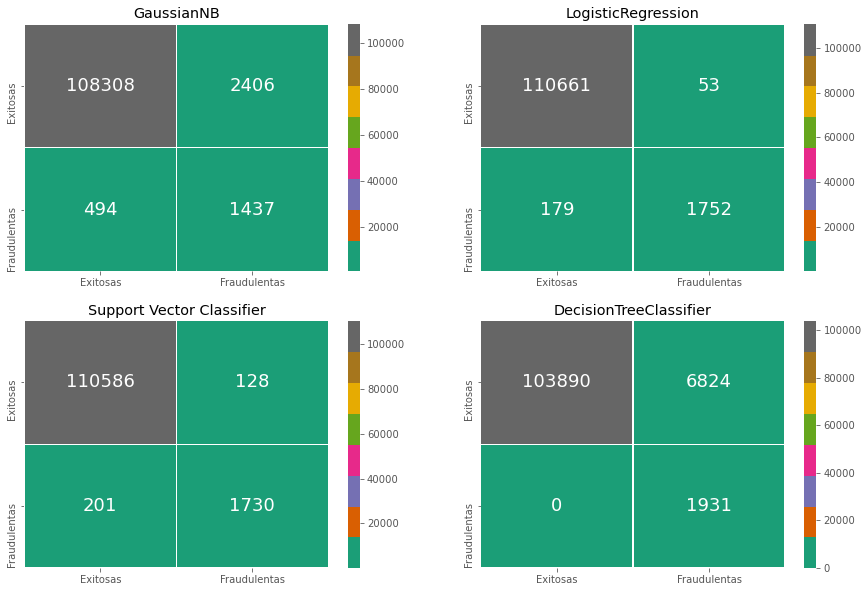

In [169]:
matrizC = [("GaussianNB", confusion_matrix(original_ytest, salidas['y_GNB'])),
         ("LogisticRegression", confusion_matrix(original_ytest, salidas['y_Logistc'])),
         ("Support Vector Classifier", confusion_matrix(original_ytest, salidas['y_SVC'])),
         ("DecisionTreeClassifier", confusion_matrix(original_ytest, salidas['y_Tree']))]         
         
comparar_Modelos(matrizC, labels, [2,2, 'Dark2'])
plt.show()

In [173]:
reporte_Clasificacion(salidas, original_ytest, labels)

                    REPORTE DE CLASIFICACIÓN GNB
              precision    recall  f1-score   support

    Exitosas       1.00      0.98      0.99    110714
Fraudulentas       0.37      0.74      0.50      1931

    accuracy                           0.97    112645
   macro avg       0.68      0.86      0.74    112645
weighted avg       0.98      0.97      0.98    112645

                    REPORTE DE CLASIFICACIÓN Logistc
              precision    recall  f1-score   support

    Exitosas       1.00      1.00      1.00    110714
Fraudulentas       0.97      0.91      0.94      1931

    accuracy                           1.00    112645
   macro avg       0.98      0.95      0.97    112645
weighted avg       1.00      1.00      1.00    112645

                    REPORTE DE CLASIFICACIÓN SVC
              precision    recall  f1-score   support

    Exitosas       1.00      1.00      1.00    110714
Fraudulentas       0.93      0.90      0.91      1931

    accuracy                   

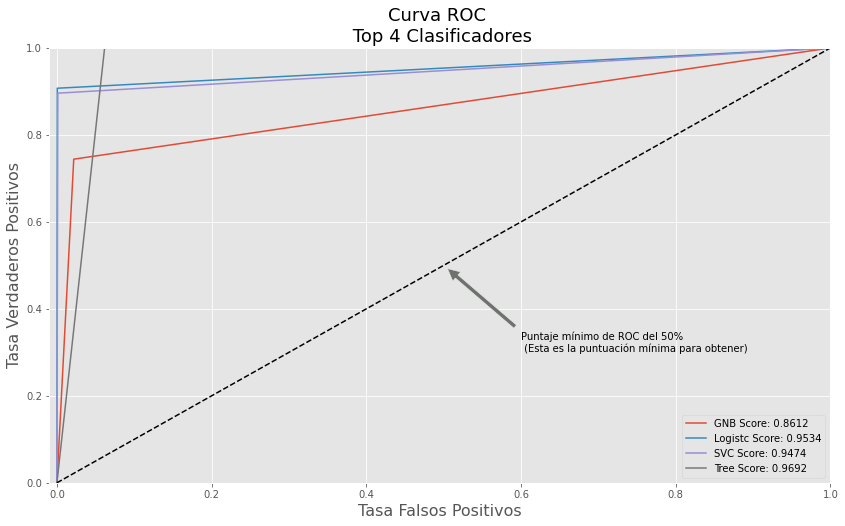

In [181]:
curva_ROC = {}
for key in salidas.keys():
    curva_ROC[key] = roc_curve(original_ytest, salidas[key])
graficar_Curva_Multiple(curva_ROC, original_ytest, salidas)
plt.show()

In [174]:
# Uso de GridSearchCV para encontrar los mejores parámetros para entrenar los modelos.
from sklearn.model_selection import GridSearchCV

# Regresion logistica
logist_Parametros = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000], 'solver' : ["newton-cg"]}
grid_log_reg = GridSearchCV(LogisticRegression(), logist_Parametros)
grid_log_reg.fit(X_Sub,y_Sub)
log_reg = grid_log_reg.best_estimator_ # Modelo de regresión logistica con los mejores parámetros

# Clasificador de vectores de soporte
svc_Parametros = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_Parametros)
grid_svc.fit(X_Sub,y_Sub)
svc = grid_svc.best_estimator_

# Arbol de desición de clasificación
tree_Parametros = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
                   "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_Parametros)
grid_tree.fit(X_Sub,y_Sub)
tree_clf = grid_tree.best_estimator_

In [176]:
def model_Rendmiento(model, X_Model, y_Model):
    training_score = cross_val_score(model, X_Model, y_Model, cv=3)
    print(f"{'=' * 100}")
    print("Clasificador: ", model.__class__.__name__)
    print("Rendimiento del entrenamiento: {:.3f}%".format(model.score(X_Model, y_Model)*100))
    print("Rendimiento del entrenamiento con VC: {:.3f}%".format(training_score.mean()*100))    

In [178]:
# Rendimiento de cada modelo con los hiperparámetros

model_Rendmiento(log_reg, X_Sub, y_Sub)
model_Rendmiento(svc, X_Sub, y_Sub)
model_Rendmiento(tree_clf, X_Sub, y_Sub)

Clasificador:  LogisticRegression
Rendimiento del entrenamiento: 95.230%
Rendimiento del entrenamiento con VC: 95.230%
Clasificador:  SVC
Rendimiento del entrenamiento: 93.076%
Rendimiento del entrenamiento con VC: 92.496%
Clasificador:  DecisionTreeClassifier
Rendimiento del entrenamiento: 97.171%
Rendimiento del entrenamiento con VC: 97.171%


In [182]:
# Predicciones Respectivas
salidas_Hip = {
    'y_GNB'    : salidas['y_GNB'],
    'y_Logistc': log_reg.predict(original_Xtest),
    'y_SVC'    : svc.predict(original_Xtest),
    'y_Tree'   : tree_clf.predict(original_Xtest)   
}

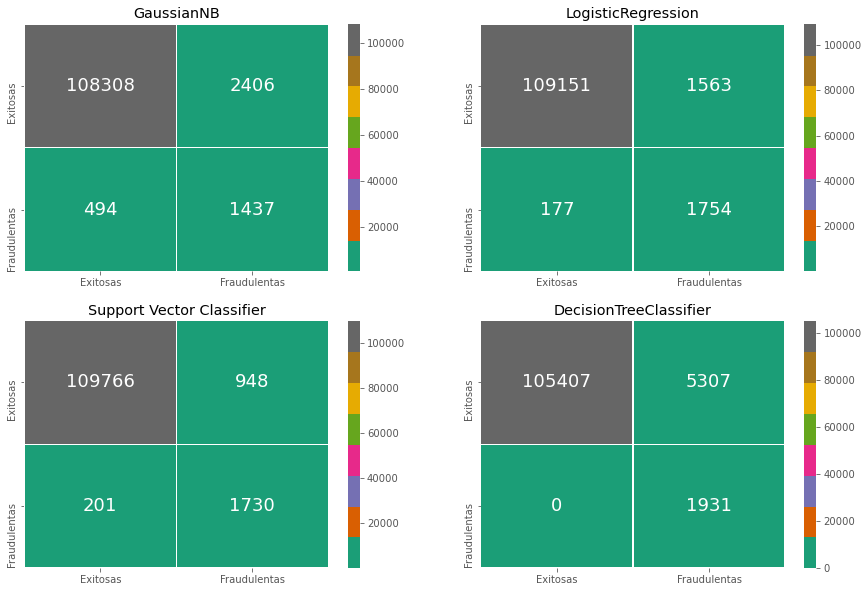

In [183]:
#Matriz de Confusión
matrizC_HIP = [("GaussianNB", confusion_matrix(original_ytest, salidas_Hip['y_GNB'])),
         ("LogisticRegression", confusion_matrix(original_ytest, salidas_Hip['y_Logistc'])),
         ("Support Vector Classifier", confusion_matrix(original_ytest, salidas_Hip['y_SVC'])),
         ("DecisionTreeClassifier", confusion_matrix(original_ytest, salidas_Hip['y_Tree']))]         
         
comparar_Modelos(matrizC_HIP, labels, [2,2, 'Dark2'])

In [184]:
reporte_Clasificacion(salidas_Hip, original_ytest, labels)

                    REPORTE DE CLASIFICACIÓN GNB
              precision    recall  f1-score   support

    Exitosas       1.00      0.98      0.99    110714
Fraudulentas       0.37      0.74      0.50      1931

    accuracy                           0.97    112645
   macro avg       0.68      0.86      0.74    112645
weighted avg       0.98      0.97      0.98    112645

                    REPORTE DE CLASIFICACIÓN Logistc
              precision    recall  f1-score   support

    Exitosas       1.00      0.99      0.99    110714
Fraudulentas       0.53      0.91      0.67      1931

    accuracy                           0.98    112645
   macro avg       0.76      0.95      0.83    112645
weighted avg       0.99      0.98      0.99    112645

                    REPORTE DE CLASIFICACIÓN SVC
              precision    recall  f1-score   support

    Exitosas       1.00      0.99      0.99    110714
Fraudulentas       0.65      0.90      0.75      1931

    accuracy                   

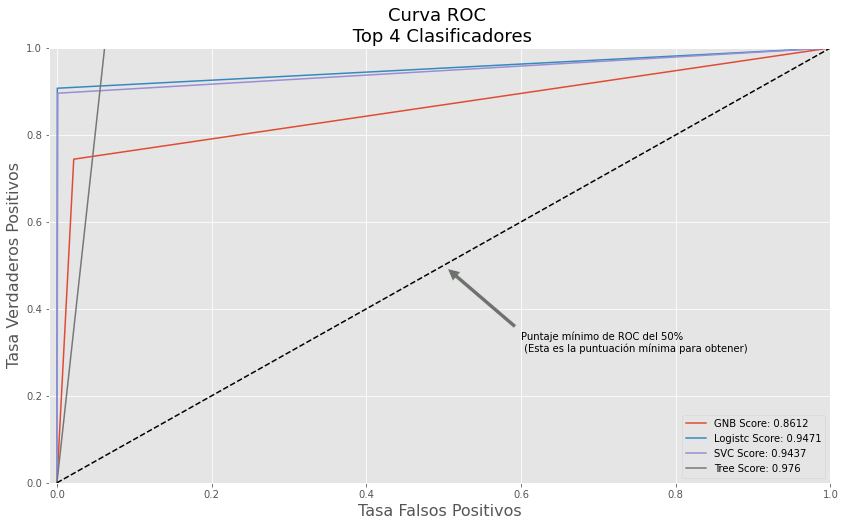

In [185]:
curva_ROC_HIP = {}
for key in salidas_Hip.keys():
    curva_ROC_HIP[key] = roc_curve(original_ytest, salidas_Hip[key])
graficar_Curva_Multiple(curva_ROC, original_ytest, salidas_Hip)
plt.show()

### Comparando Salidas

In [128]:
def comparar_Salidas(salida_Modelo, salida_Deseada):
    dataFrame =  pd.DataFrame(salida_Modelo)
    dataFrame = pd.concat((dataFrame, pd.DataFrame({'Salida Deseada':salida_Deseada})), axis = 1)
    return dataFrame

In [129]:
# Modelos sin ajuste de Hiperparámetros

#PATH = r"ruta donde va a guardar el archivo + el nombre con la extensión"

salidas_Default = comparar_Salidas(salidas, original_ytest)
#salidas_Default.to_csv(PATH)
salidas_Default.head(10)

,y_Logistc,y_Logistc_Ajustado,Salida Deseada
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,0.00,0.00,0.00
3,0.00,0.00,0.00
4,0.00,0.00,0.00
5,0.00,0.00,0.00
6,0.00,0.00,0.00
7,0.00,0.00,0.00
8,0.00,0.00,0.00
9,0.00,0.00,0.00


In [93]:
salidas_Ajustada = comparar_Salidas(salidas_Hip, original_ytest)
#salidas_Ajustada.to_csv(PATH)
salidas_Ajustada.head(10)

,y_Logistc,y_Logistc_Ajustado,Salida Deseada
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,0.00,0.00,0.00
3,0.00,0.00,0.00
4,0.00,0.00,0.00
...,...,...,...
112640,0.00,1.00,1.00
112641,0.00,1.00,1.00
112642,0.00,0.00,1.00
112643,0.00,0.00,1.00
